# Data Pre Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## The Dataset

In [2]:
df = pd.read_csv('archive/TrafficTwoMonth.csv')
print(df.shape)
df.head()

(5952, 9)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [3]:
columns = list(df.columns)
columns

['Time',
 'Date',
 'Day of the week',
 'CarCount',
 'BikeCount',
 'BusCount',
 'TruckCount',
 'Total',
 'Traffic Situation']

### Total Number of vehicles with Traffic Situation 

<Axes: title={'center': 'Average number of vehicles in different traffic situations'}, xlabel='Traffic Situation', ylabel='Total number of vehicles'>

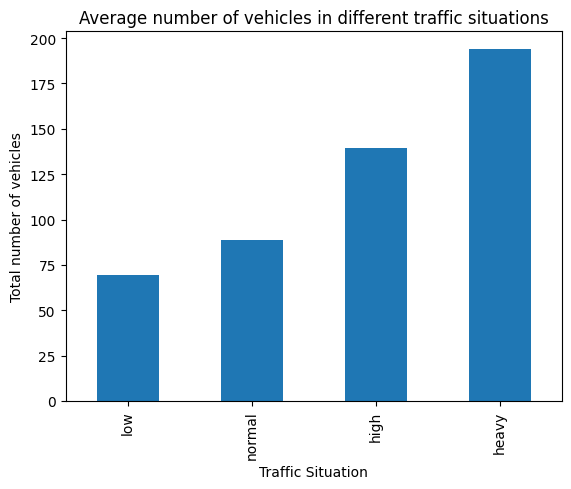

In [4]:
df.groupby('Traffic Situation')['Total'].mean().sort_values(ascending=True).plot.bar(ylabel='Total number of vehicles', title='Average number of vehicles in different traffic situations')

## About the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


## Values for feature "Day of the week"

In [6]:
Days = list(df['Day of the week'].unique())
print(Days)
print(len(Days))

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
7


## Values for feature "Time"

In [7]:
Times = list(df['Time'].unique())
print(Times)
print(len(Times))

['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM', '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM', '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM', '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM', '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM', '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM', '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM', '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM', '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM', '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM', '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM', '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM', '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM', '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM', '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM', '3:00:00 PM', '3:15:00 PM', '3:30:00 PM', '3:45:00 PM', '4:00:00 PM', '4:15:00 PM', '4:30:00 PM', '4:45:00 PM', '5:00:00 PM', '5:15:00 PM', '5:

## Get the features only needed for the model

In [8]:
df.drop(columns=['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Traffic Situation'], inplace=True)

df.head()

,Time,Day of the week,Total
0,12:00:00 AM,Tuesday,41
1,12:15:00 AM,Tuesday,52
2,12:30:00 AM,Tuesday,46
3,12:45:00 AM,Tuesday,50
4,1:00:00 AM,Tuesday,48


## About dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Time             5952 non-null   object
 1   Day of the week  5952 non-null   object
 2   Total            5952 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 139.6+ KB


### Total Number of vehicles with Time of the Day

<Axes: title={'center': 'Average number of vehicles in different traffic situations'}, xlabel='Time of the day', ylabel='Total number of vehicles'>

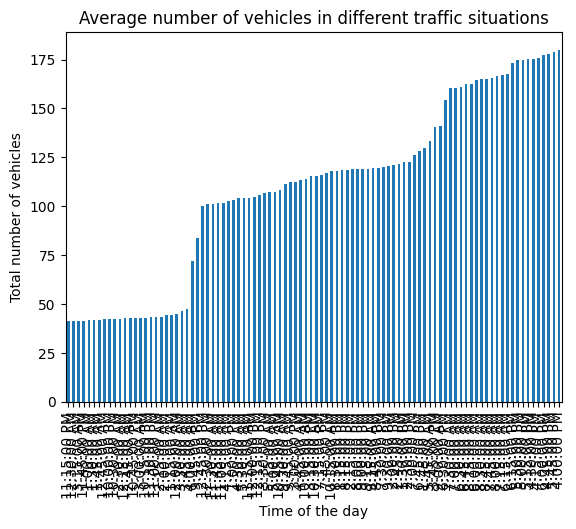

In [10]:
df.groupby('Time')['Total'].mean().sort_values(ascending=True).plot.bar(xlabel='Time of the day', ylabel='Total number of vehicles', title='Average number of vehicles in different traffic situations')

### Total Number of vehicles with Day of the Weak

<Axes: title={'center': 'Average number of vehicles in different traffic situations'}, xlabel='Day of the week', ylabel='Total number of vehicles'>

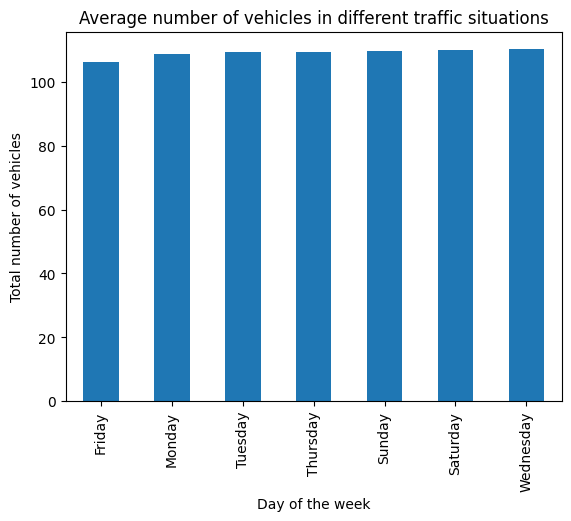

In [11]:
df.groupby('Day of the week')['Total'].mean().sort_values(ascending=True).plot.bar( ylabel='Total number of vehicles', title='Average number of vehicles in different traffic situations')

## Correlation

### Convet features to integer for correlation mapping

In [12]:
corr_data = df.copy()
corr_data.head()

,Time,Day of the week,Total
0,12:00:00 AM,Tuesday,41
1,12:15:00 AM,Tuesday,52
2,12:30:00 AM,Tuesday,46
3,12:45:00 AM,Tuesday,50
4,1:00:00 AM,Tuesday,48


In [13]:
# Create a mapping for time intervals
time_mapping = {time: idx for idx, time in enumerate(sorted(corr_data['Time'].unique()))}

# Create a mapping for days of the week
#day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
day_mapping = {day: idx for idx, day in enumerate(sorted(corr_data['Day of the week'].unique()))}

# Apply the mappings to the DataFrame
corr_data['Time'] = corr_data['Time'].map(time_mapping)
corr_data['Day of the week'] = corr_data['Day of the week'].map(day_mapping)

### Day of the weak for check correlation

In [14]:
Days_corr = list(corr_data['Day of the week'].unique())
print(Days_corr)
print(len(Days_corr))

[5, 6, 4, 0, 2, 3, 1]
7


### Time for check correlation

In [15]:
Time_corr = list(corr_data['Time'].unique())
print(Time_corr)
print(len(Time_corr))

[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 0, 2, 4, 6, 8, 10, 12, 14, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 1, 3, 5, 7, 9, 11, 13, 15]
96


In [16]:
df.head()

,Time,Day of the week,Total
0,12:00:00 AM,Tuesday,41
1,12:15:00 AM,Tuesday,52
2,12:30:00 AM,Tuesday,46
3,12:45:00 AM,Tuesday,50
4,1:00:00 AM,Tuesday,48


In [19]:
corr_data.head()

,Time,Day of the week,Total
0,16,5,41
1,18,5,52
2,20,5,46
3,22,5,50
4,24,5,48


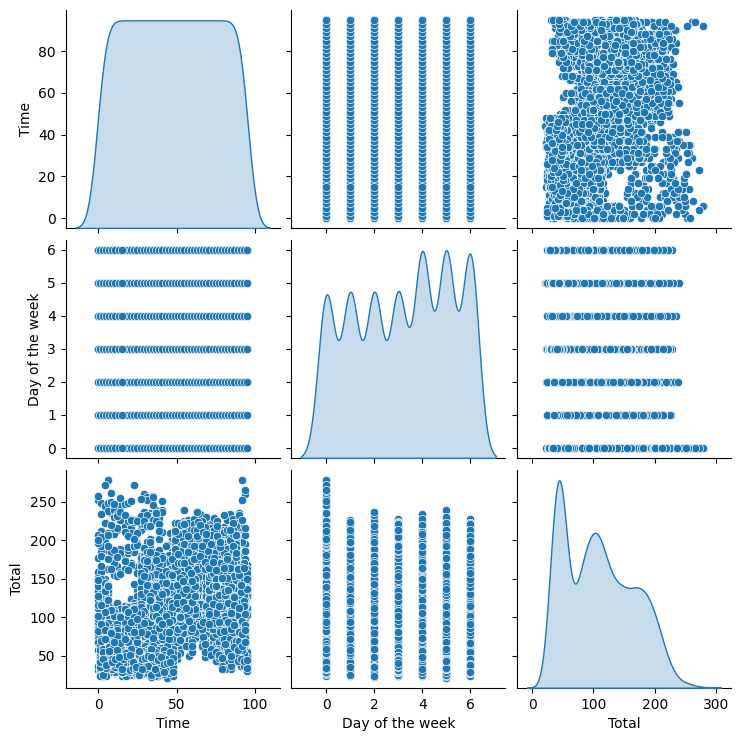

In [21]:
sns.pairplot(corr_data,diag_kind='kde')

## Heatmap

<Axes: >

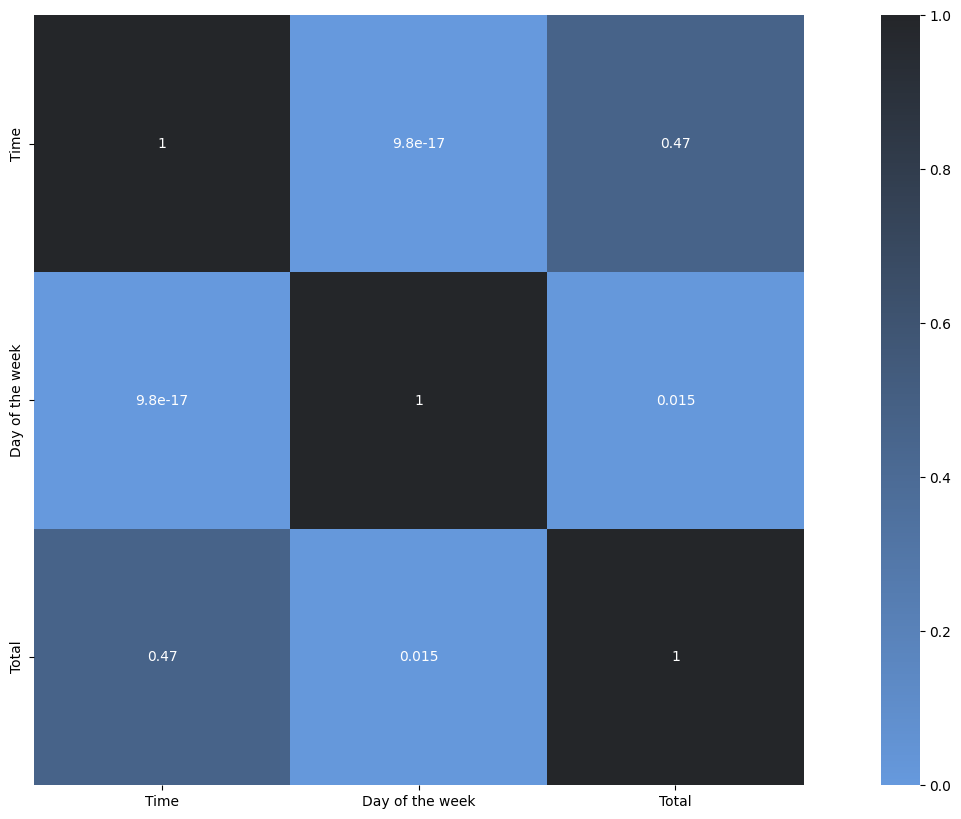

In [22]:
f, ax = plt.subplots(figsize=(20, 10))
corr = corr_data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            square=True, ax=ax,annot=True)